# Modelo de Depredador-Presa

En este documento presentamos el modelo biológico de __Lotka-Volterra__, que representa la dinámica de dos especies, en la cual una es el depredador de la otra. 


## Las ecuaciones de Lotka-Volterra

Dadas $x_1(t)$ e $x_2(t)$ la población de la presa (liebres) y depredador (lince), el modelo determina que la tasa de crecimiento de estas especies es: 


$$\frac{dx_1}{dt} = rx_1-ax_1x_2,$$
$$\frac{dx_2}{dt} = bx_1x_2-mx_2,$$

donde $r$ es la tasa de crecimiento de las liebres, $m$ es la tasa de mortalidad de los linces si no encuentran presas, $a$ es la tasa de mortalidad de las liebres debido a los encuentros con linces y $b$ indican la sobrevivencia de los linces debida a los encuentros con liebres. 

El modelo incluye varias suposiciones que hay que tener en cuenta: 

* La población de las liebres crece ilimitadamente en ausencia de linces.
* Los linces depeden de las liebres para sobrevivir.

Entonces, buscamos: **a)** Simular el modelo; **b)** Estudiar el efecto del tiempo de paso en la simulación; **c)** Simular el modelo con los método de Runge Kutta.


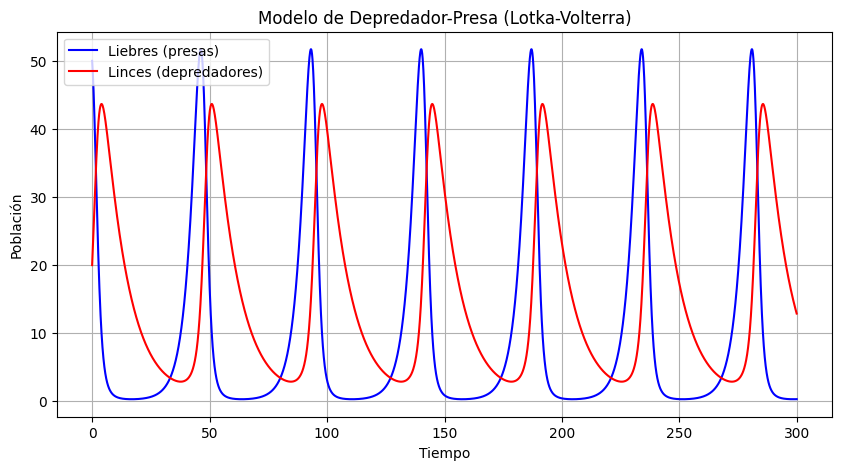

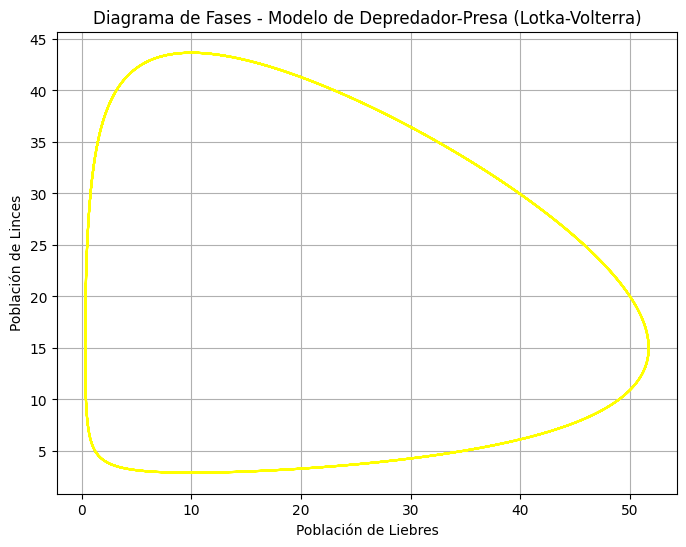

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de parámetros
r = 0.3  # Tasa de crecimiento de las liebres
a = 0.02  # Tasa de mortalidad de las liebres debido a los encuentros con linces
b = 0.01  # Tasa de sobrevivencia de los linces debido a los encuentros con liebres
m = 0.1  # Tasa de mortalidad de los linces

# Definición de las ecuaciones de Lotka-Volterra
def lotka_volterra(t, populations):
    x1, x2 = populations
    dx1_dt = r * x1 - a * x1 * x2
    dx2_dt = b * x1 * x2 - m * x2
    return np.array([dx1_dt, dx2_dt])

# Método de Runge-Kutta de cuarto orden
def runge_kutta_4(f, y0, t0, tf, dt):
    t_values = np.arange(t0, tf, dt)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0

    for i in range(1, len(t_values)):
        t = t_values[i - 1]
        y = y_values[i - 1]

        k1 = f(t, y)
        k2 = f(t + dt / 2, y + dt / 2 * k1)
        k3 = f(t + dt / 2, y + dt / 2 * k2)
        k4 = f(t + dt, y + dt * k3)

        y_values[i] = y + dt / 6 * (k1 + 2 * k2 + 2 * k3 + k4)

    return t_values, y_values

# Condiciones iniciales
x1_0 = 50 # Población inicial de liebres
x2_0 = 20   # Población inicial de linces
y0 = [x1_0, x2_0]

# Simulación
t0, tf, dt = 0, 300, 0.1  # Tiempo inicial, final y paso
t_values, populations = runge_kutta_4(lotka_volterra, y0, t0, tf, dt)

# Graficar los resultados
x1_values = populations[:, 0]
x2_values = populations[:, 1]

plt.figure(figsize=(10, 5))
plt.plot(t_values, x1_values, label='Liebres (presas)', color='b')
plt.plot(t_values, x2_values, label='Linces (depredadores)', color='r')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title('Modelo de Depredador-Presa (Lotka-Volterra)')
plt.legend()
plt.grid()
plt.show()

# Crear un diagrama de fases para el código proporcionado

# Utilizando los valores generados en la simulación anterior
plt.figure(figsize=(8, 6))
plt.plot(x1_values, x2_values, color='yellow')
plt.xlabel('Población de Liebres')
plt.ylabel('Población de Linces')
plt.title('Diagrama de Fases - Modelo de Depredador-Presa (Lotka-Volterra)')
plt.grid()
plt.show()




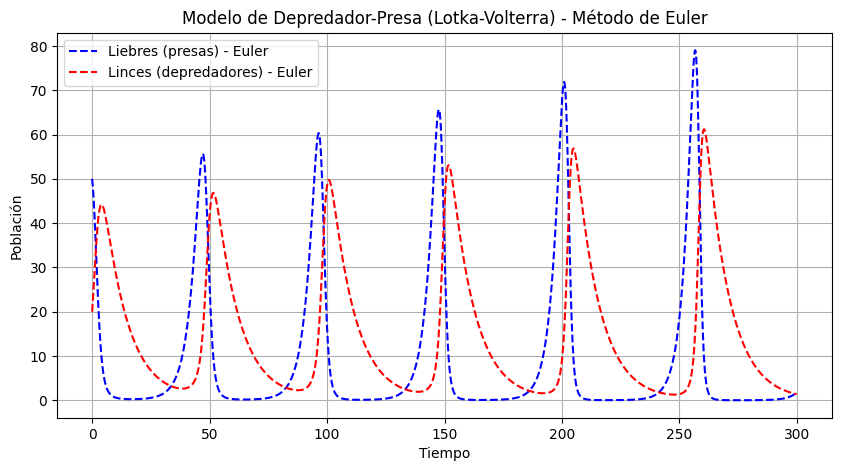

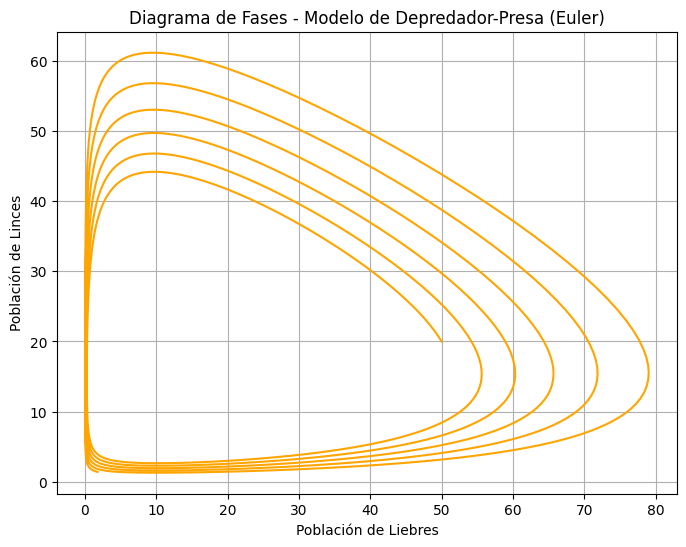

In [3]:
# Método de Euler para el sistema de Lotka-Volterra
def euler_method(f, y0, t0, tf, dt):
    t_values = np.arange(t0, tf, dt)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0

    for i in range(1, len(t_values)):
        t = t_values[i - 1]
        y = y_values[i - 1]

        y_values[i] = y + dt * f(t, y)

    return t_values, y_values

# Simulación usando el método de Euler
t_values_euler, populations_euler = euler_method(lotka_volterra, y0, t0, tf, dt)

# Graficar los resultados usando el método de Euler
x1_values_euler = populations_euler[:, 0]
x2_values_euler = populations_euler[:, 1]

plt.figure(figsize=(10, 5))
plt.plot(t_values_euler, x1_values_euler, label='Liebres (presas) - Euler', color='b', linestyle='--')
plt.plot(t_values_euler, x2_values_euler, label='Linces (depredadores) - Euler', color='r', linestyle='--')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title('Modelo de Depredador-Presa (Lotka-Volterra) - Método de Euler')
plt.legend()
plt.grid()
plt.show()

# Crear un diagrama de fases usando el método de Euler
plt.figure(figsize=(8, 6))
plt.plot(x1_values_euler, x2_values_euler, color='orange')
plt.xlabel('Población de Liebres')
plt.ylabel('Población de Linces')
plt.title('Diagrama de Fases - Modelo de Depredador-Presa (Euler)')
plt.grid()
plt.show()


## Referencias

[1] - Hills, A. (2023). Modelling Predator-Prey Systems in Python.https://github.com/INASIC/predator-prey_systems/tree/master

[2] - Hoppensteadt, F. (2006). "Predator-prey model". Scholarpedia. p. 1563.

[3] - Velten, K. (2010). Mathematical Modeling and Simulation. Wiley.